### Importing relevant packages

In [1]:
## Import up sound alert dependencies
from IPython.display import Audio, display

def allDone():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
## Insert whatever audio file you want above

In [2]:
allDone()

In [2]:
import string
from nltk.tokenize.treebank import TreebankWordDetokenizer
from gensim.utils import simple_preprocess
import gensim
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import pandas as pd
from nltk.corpus import stopwords
import nltk

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from keras.layers import  Dropout, BatchNormalization
from keras.layers.wrappers import Bidirectional

In [4]:
import bz2
import _pickle as cPickle
import zipfile


# Load data

In [5]:
train=pd.read_pickle(r'C:\Users\chriq\OneDrive\Documents\my_data\MLdata\train_set.zip' )

# Get our input vectors out of the dataset

In [6]:
train

,obfuscated_bool,js,obfuscator_name,js_length,num_spaces,num_parenthesis,num_slash,num_plus,num_point,num_comma,...,num_numeric,ratio_spaces,ratio_alpha,ratio_numeric,ratio_parenthesis,ratio_slash,ratio_plus,ratio_point,ratio_comma,ratio_semicolon
115028,1,"\nvar a0_0x5108 = [\n 'onreadystatechange',...",obfuscator_io,4138,1057,178,0,8,0,56,...,972,0.255437,0.580957,0.234896,0.043016,0.000000,0.001933,0.000000,0.013533,0.008942
85481,0,\n\n\n\n\n\ngoog.provide('goog.dom');\ngoog.pr...,0,49232,8591,867,25,29,1248,229,...,152,0.174500,0.680817,0.003087,0.017610,0.000508,0.000589,0.025349,0.004651,0.008084
24018,0,"\n\nMathJax.OutputJax.SVG.FONTDATA.FONTS[""STIX...",0,30618,6448,2,4,1,10,327,...,18175,0.210595,0.651773,0.593605,0.000065,0.000131,0.000033,0.000327,0.010680,0.000065
184850,1,"var a0_0x3281 = [\n '165473rekVYY',\n '1...",obfuscator_io,1295,267,74,0,6,0,19,...,323,0.206178,0.611583,0.249421,0.057143,0.000000,0.004633,0.000000,0.014672,0.009266
128047,1,"\n(function ($fog$136, $fog$0, $fog$1, $fog$2,...",jfogs,14673,1767,800,15,4,2,334,...,1363,0.120425,0.584816,0.092892,0.054522,0.001022,0.000273,0.000136,0.022763,0.015062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83486,0,"CKEDITOR.plugins.setLang(""colordialog"",""nb"",{c...",0,145,3,2,0,0,2,6,...,0,0.020690,0.758621,0.000000,0.013793,0.000000,0.000000,0.013793,0.041379,0.006897
124699,1,"(function(){function a(f,g){var b=new Array(5)...",defendjs,4866,61,436,0,113,62,273,...,1326,0.012536,0.590629,0.272503,0.089601,0.000000,0.023222,0.012741,0.056104,0.047267
135210,1,"var a0_0x1e51 = [\n 'goog.array',\n 'get...",obfuscator_io,30096,3337,1906,2,48,44,543,...,8666,0.110879,0.684875,0.287945,0.063331,0.000066,0.001595,0.001462,0.018042,0.005283
79248,0,\n\n\nfunction testcase() {\n function ...,0,682,223,28,0,0,7,3,...,15,0.326979,0.517595,0.021994,0.041056,0.000000,0.000000,0.010264,0.004399,0.019062


In [7]:
train.drop(columns='obfuscator_name',inplace=True)

In [8]:
train

,obfuscated_bool,js,js_length,num_spaces,num_parenthesis,num_slash,num_plus,num_point,num_comma,num_semicolon,...,num_numeric,ratio_spaces,ratio_alpha,ratio_numeric,ratio_parenthesis,ratio_slash,ratio_plus,ratio_point,ratio_comma,ratio_semicolon
115028,1,"\nvar a0_0x5108 = [\n 'onreadystatechange',...",4138,1057,178,0,8,0,56,37,...,972,0.255437,0.580957,0.234896,0.043016,0.000000,0.001933,0.000000,0.013533,0.008942
85481,0,\n\n\n\n\n\ngoog.provide('goog.dom');\ngoog.pr...,49232,8591,867,25,29,1248,229,398,...,152,0.174500,0.680817,0.003087,0.017610,0.000508,0.000589,0.025349,0.004651,0.008084
24018,0,"\n\nMathJax.OutputJax.SVG.FONTDATA.FONTS[""STIX...",30618,6448,2,4,1,10,327,2,...,18175,0.210595,0.651773,0.593605,0.000065,0.000131,0.000033,0.000327,0.010680,0.000065
184850,1,"var a0_0x3281 = [\n '165473rekVYY',\n '1...",1295,267,74,0,6,0,19,12,...,323,0.206178,0.611583,0.249421,0.057143,0.000000,0.004633,0.000000,0.014672,0.009266
128047,1,"\n(function ($fog$136, $fog$0, $fog$1, $fog$2,...",14673,1767,800,15,4,2,334,221,...,1363,0.120425,0.584816,0.092892,0.054522,0.001022,0.000273,0.000136,0.022763,0.015062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83486,0,"CKEDITOR.plugins.setLang(""colordialog"",""nb"",{c...",145,3,2,0,0,2,6,1,...,0,0.020690,0.758621,0.000000,0.013793,0.000000,0.000000,0.013793,0.041379,0.006897
124699,1,"(function(){function a(f,g){var b=new Array(5)...",4866,61,436,0,113,62,273,230,...,1326,0.012536,0.590629,0.272503,0.089601,0.000000,0.023222,0.012741,0.056104,0.047267
135210,1,"var a0_0x1e51 = [\n 'goog.array',\n 'get...",30096,3337,1906,2,48,44,543,159,...,8666,0.110879,0.684875,0.287945,0.063331,0.000066,0.001595,0.001462,0.018042,0.005283
79248,0,\n\n\nfunction testcase() {\n function ...,682,223,28,0,0,7,3,13,...,15,0.326979,0.517595,0.021994,0.041056,0.000000,0.000000,0.010264,0.004399,0.019062


In [9]:
train['num_par']=train.apply(lambda x:x[2:].tolist(),axis=1)

## There are 19 numerical input parameters

In [10]:
len(train.num_par.loc[0])

19

In [11]:
train.num_par.loc[0]

[2659,
 151,
 90,
 3,
 8,
 107,
 13,
 59,
 1729,
 18,
 0.05678826626551335,
 0.6502444528018052,
 0.006769462203836028,
 0.03384731101918014,
 0.0011282437006393381,
 0.003008649868371568,
 0.040240691989469723,
 0.004889056036103798,
 0.022188792779240317]

## Creating dummies for the labels

In [12]:
labels=train.obfuscated_bool.to_numpy()
labels_onehot=pd.get_dummies(labels).values

In [13]:
labels_onehot

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [14]:
nn_input=np.array(train.num_par.to_list())
nn_input[0]

array([4.13800000e+03, 1.05700000e+03, 1.78000000e+02, 0.00000000e+00,
       8.00000000e+00, 0.00000000e+00, 5.60000000e+01, 3.70000000e+01,
       2.40400000e+03, 9.72000000e+02, 2.55437409e-01, 5.80956984e-01,
       2.34896085e-01, 4.30159497e-02, 0.00000000e+00, 1.93330111e-03,
       0.00000000e+00, 1.35331078e-02, 8.94151764e-03])

In [15]:
print(f"mean: {nn_input.mean()}\nstd: {nn_input.std()}")
print(f"min: {nn_input.min()}\nmax: {nn_input.max()}")

mean: 2820.391719445004
std: 69824.90011106507
min: 0.0
max: 30216572.0


## Normalize data

In [17]:
# normalize to [0..1]
nn_input_norm = (nn_input-nn_input.mean()) /nn_input .std() 

In [18]:
print(f"mean: {nn_input_norm.mean()}\nstd: {nn_input_norm.std()}")
print(f"min: {nn_input_norm.min()}\nmax: {nn_input_norm.max()}")

mean: -2.680524439704499e-17
std: 1.0000000000000009
min: -0.04039234878902548
max: 432.70740896473717


## Split data for training and validation data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(nn_input,labels_onehot,train_size=0.8, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

120032 30008 120032 30008


In [18]:
# add f1 score as one of the accuracy measures of the model

In [19]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



## Run the model 

In [36]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(BatchNormalization())


regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.25))
regressor.add(BatchNormalization())

regressor.add(Dense(2, activation='sigmoid'))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy',f1_m])

lstm_history=regressor.fit(X_train, y_train,validation_data=(X_test,y_test), epochs = 15, batch_size = 100)

Epoch 1/15
1201/1201 [==============================] - 26s 20ms/step - loss: 0.0449 - accuracy: 0.9439 - f1_m: 0.9423 - val_loss: 0.0363 - val_accuracy: 0.9551 - val_f1_m: 0.9552ETA: 9s -
Epoch 2/15
1201/1201 [==============================] - 25s 21ms/step - loss: 0.0248 - accuracy: 0.9687 - f1_m: 0.9685 - val_loss: 0.0915 - val_accuracy: 0.8853 - val_f1_m: 0.8853
Epoch 3/15
1201/1201 [==============================] - 25s 21ms/step - loss: 0.0233 - accuracy: 0.9703 - f1_m: 0.9702 - val_loss: 0.0427 - val_accuracy: 0.9416 - val_f1_m: 0.9416
Epoch 4/15
1201/1201 [==============================] - 26s 21ms/step - loss: 0.0198 - accuracy: 0.9744 - f1_m: 0.9746 - val_loss: 0.0226 - val_accuracy: 0.9712 - val_f1_m: 0.9712
Epoch 5/15
1201/1201 [==============================] - 26s 21ms/step - loss: 0.0188 - accuracy: 0.9764 - f1_m: 0.9764 - val_loss: 0.0303 - val_accuracy: 0.9633 - val_f1_m: 0.9629
Epoch 6/15
1201/1201 [==============================] - 27s 22ms/step - loss: 0.0187 - accu

## Display results and improvement of the model toward convergence

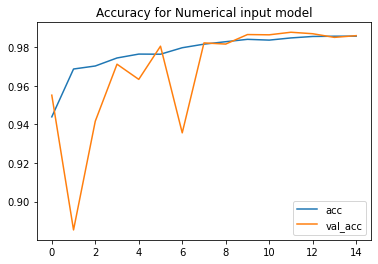

<Figure size 432x288 with 0 Axes>

In [37]:
plt.plot(lstm_history.history['accuracy'], label='acc')
plt.plot(lstm_history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy for Numerical input model')
plt.legend()
plt.show()
plt.savefig("Accuracy_numreical_input.jpg")

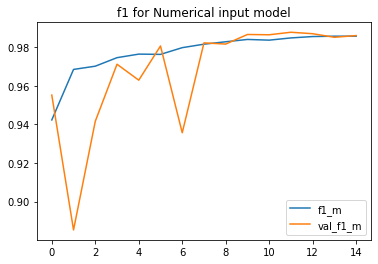

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(lstm_history.history['f1_m'], label='f1_m')
plt.plot(lstm_history.history['val_f1_m'], label='val_f1_m')
plt.title('f1 for Numerical input model')
plt.legend()
plt.show()
plt.savefig("f1_num_input_model.jpg")

In [39]:
regressor.evaluate(X_train,y_train)

3751/3751 [==============================] - 12s 3ms/step - loss: 0.0114 - accuracy: 0.9857 - f1_m: 0.9857


[0.011411089450120926, 0.9857121706008911, 0.9857080578804016]

In [40]:
regressor.save(r'C:\Users\chriq\OneDrive\Documents\my_data\MLdata\mymodels\lstm_num_input')

INFO:tensorflow:Assets written to: C:\Users\chriq\OneDrive\Documents\my_data\MLdata\mymodels\lstm_num_input\assets


INFO:tensorflow:Assets written to: C:\Users\chriq\OneDrive\Documents\my_data\MLdata\mymodels\lstm_num_input\assets


# Prepare and try test set

In [24]:
test=pd.read_pickle(r'C:\Users\chriq\OneDrive\Documents\my_data\MLdata\test_set.zip')

In [41]:
test

,obfuscated_bool,js,js_length,num_spaces,num_parenthesis,num_slash,num_plus,num_point,num_comma,num_semicolon,...,ratio_spaces,ratio_alpha,ratio_numeric,ratio_parenthesis,ratio_slash,ratio_plus,ratio_point,ratio_comma,ratio_semicolon,num_par
162438,1,"var a0_0x190c = [\n 'result',\n '687571V...",1531,309,74,0,6,0,27,15,...,0.201829,0.605487,0.266492,0.048334,0.000000,0.003919,0.000000,0.017636,0.009798,"[1531, 309, 74, 0, 6, 0, 27, 15, 927, 408, 0.2..."
121867,1,"\n(function ($fog$1691, $fog$0, $fog$1, $fog$2...",138160,28175,2623,24,323,395,6361,917,...,0.203930,0.570172,0.139266,0.018985,0.000174,0.002338,0.002859,0.046041,0.006637,"[138160, 28175, 2623, 24, 323, 395, 6361, 917,..."
168134,1,"(function(){function a(f,g){var b=new Array(9)...",9437,140,706,6,122,176,433,398,...,0.014835,0.608350,0.207163,0.074812,0.000636,0.012928,0.018650,0.045883,0.042174,"[9437, 140, 706, 6, 122, 176, 433, 398, 5741, ..."
139568,1,"var a0_0x1616 = [\n 'serialize',\n '#sha...",7293,1125,566,8,20,20,113,61,...,0.154258,0.632799,0.197450,0.077609,0.001097,0.002742,0.002742,0.015494,0.008364,"[7293, 1125, 566, 8, 20, 20, 113, 61, 4615, 14..."
52426,0,"\n\n\n\n\n\nif (typeof KJUR == ""undefined"" || ...",10712,2566,304,6,9,407,39,189,...,0.239544,0.587005,0.018484,0.028379,0.000560,0.000840,0.037995,0.003641,0.017644,"[10712, 2566, 304, 6, 9, 407, 39, 189, 6288, 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11199,0,'use strict';\n\nvar ub = require('uibase');\n...,1367,450,54,0,4,21,17,22,...,0.329188,0.456474,0.016825,0.039503,0.000000,0.002926,0.015362,0.012436,0.016094,"[1367, 450, 54, 0, 4, 21, 17, 22, 624, 23, 0.3..."
31062,0,module.exports = {\n breakpoints: {\n '1x'...,1047,429,4,0,0,9,28,1,...,0.409742,0.423114,0.098376,0.003820,0.000000,0.000000,0.008596,0.026743,0.000955,"[1047, 429, 4, 0, 0, 9, 28, 1, 443, 103, 0.409..."
93141,0,;(function($) {\n\n\t$.noty.themes.defaultThem...,6060,286,149,16,16,110,77,57,...,0.047195,0.664356,0.050330,0.024587,0.002640,0.002640,0.018152,0.012706,0.009406,"[6060, 286, 149, 16, 16, 110, 77, 57, 4026, 30..."
23958,0,"\n\nMathJax.Localization.addTranslation(""mk"",""...",5010,142,10,3,0,16,16,2,...,0.028343,0.803992,0.536128,0.001996,0.000599,0.000000,0.003194,0.003194,0.000399,"[5010, 142, 10, 3, 0, 16, 16, 2, 4028, 2686, 0..."


In [ ]:
test.drop(columns='obfuscator_name',inplace=True)

In [27]:
test['num_par']=test.apply(lambda x:x[2:].tolist(),axis=1)

In [43]:
len(test.num_par.iloc[0])

19

In [44]:
labels=test.obfuscated_bool.to_numpy()
labels_onehot=pd.get_dummies(labels).values

In [45]:
labels_onehot

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [46]:
nn_input=np.array(test.num_par.to_list())
nn_input[0]

array([1.53100000e+03, 3.09000000e+02, 7.40000000e+01, 0.00000000e+00,
       6.00000000e+00, 0.00000000e+00, 2.70000000e+01, 1.50000000e+01,
       9.27000000e+02, 4.08000000e+02, 2.01828870e-01, 6.05486610e-01,
       2.66492489e-01, 4.83344219e-02, 0.00000000e+00, 3.91900718e-03,
       0.00000000e+00, 1.76355323e-02, 9.79751796e-03])

In [47]:
print(f"mean: {nn_input.mean()}\nstd: {nn_input.std()}")
print(f"min: {nn_input.min()}\nmax: {nn_input.max()}")

mean: 2629.5831881739987
std: 47816.69419119269
min: 0.0
max: 11980306.0


## Actual evaluation of the model on test set, Disappointing 

In [50]:
regressor.evaluate(nn_input,labels_onehot)

1173/1173 [==============================] - 4s 3ms/step - loss: 0.0115 - accuracy: 0.9858 - f1_m: 0.9858


[0.011525290086865425, 0.9857637882232666, 0.9857736825942993]